In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
accidList = pd.read_csv('data/accidentInfoList.csv')
accidList.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,비,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,흐림,교차로 - 교차로안,자전거,남,73세,중상,승용,남,39세,상해없음
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,흐림,교차로 - 교차로안,자전거,여,45세,경상,승용,남,74세,상해없음
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,13세,경상,승합,남,41세,상해없음


In [3]:
accidList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3127 non-null   int64 
 1   사고일시        3127 non-null   object
 2   요일          3127 non-null   object
 3   시군구         3127 non-null   object
 4   사고내용        3127 non-null   object
 5   사망자수        3127 non-null   int64 
 6   중상자수        3127 non-null   int64 
 7   경상자수        3127 non-null   int64 
 8   부상신고자수      3127 non-null   int64 
 9   사고유형        3127 non-null   object
 10  법규위반        3127 non-null   object
 11  노면상태        3127 non-null   object
 12  기상상태        3127 non-null   object
 13  도로형태        3127 non-null   object
 14  가해운전자 차종    3127 non-null   object
 15  가해운전자 성별    3127 non-null   object
 16  가해운전자 연령    3127 non-null   object
 17  가해운전자 상해정도  3127 non-null   object
 18  피해운전자 차종    3070 non-null   object
 19  피해운전자 성별    3070 non-null   object
 20  피해운전자 연령

In [4]:
road = accidList.groupby('도로형태').size()
road

도로형태
교차로 - 교차로부근         363
교차로 - 교차로안          673
교차로 - 교차로횡단보도내      201
기타 - 기타             334
단일로 - 고가도로위           1
단일로 - 교량             14
단일로 - 기타           1513
단일로 - 지하차도(도로)내      15
단일로 - 터널              2
미분류 - 미분류             6
주차장 - 주차장             5
dtype: int64

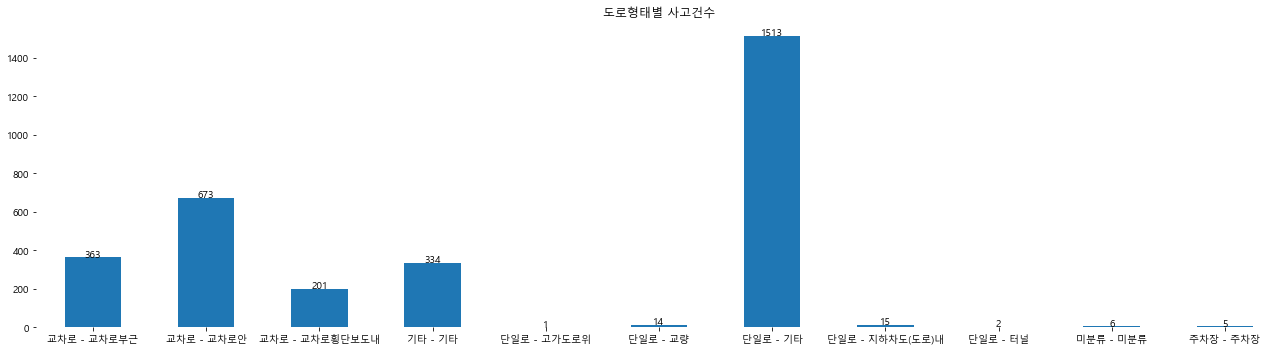

In [5]:
ax = road.plot(kind='bar', figsize=(18, 5), rot=0, title="도로형태별 사고건수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [6]:
accidList['지역구']=accidList['시군구'].str.split(" ").str[1]
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로 - 교차로안,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로 - 교차로안,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로 - 교차로안,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로 - 교차로부근,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,단일로 - 기타,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로 - 교차로안,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [7]:
accidList_gu = {}
for idx, df in accidList.groupby('지역구'):
    accidList_road = []
    for i, i_row in df.iterrows():
        accidList_road.append(i_row['도로형태'])
    accidList_gu[idx] = accidList_road
accidList_gu

{'강남구': ['단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '교차로 - 교차로부근',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '기타 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '기타 - 기타',
  '교차로 - 교차로안',
  '교차로 - 교차로안',
  '기타 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '기타 - 기타',
  '교차로 - 교차로안',
  '단일로 - 기타',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '교차로 - 교차로안',
  '기타 - 기타',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '주차장 - 주차장',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타'

In [8]:
accidList_gu_road = accidList.groupby(['지역구', '도로형태']).size()
accidList_gu_road

지역구  도로형태          
강남구  교차로 - 교차로부근       14
     교차로 - 교차로안        13
     교차로 - 교차로횡단보도내     6
     기타 - 기타           24
     단일로 - 기타          64
                       ..
중랑구  교차로 - 교차로안        56
     교차로 - 교차로횡단보도내    15
     기타 - 기타           18
     단일로 - 기타          79
     미분류 - 미분류          1
Length: 152, dtype: int64

In [9]:
type(accidList_gu_road)

pandas.core.series.Series

In [10]:
type(accidList)

pandas.core.frame.DataFrame

In [12]:
accidList_gu_road.columns.values

array([0], dtype=int64)

In [13]:
accidList_gu_road.columns = ['사고건수']
accidList_gu_road

사고건수
지역구 도로형태                
강남구 교차로 - 교차로부근       14
    교차로 - 교차로안        13
    교차로 - 교차로횡단보도내     6
    기타 - 기타           24
    단일로 - 기타          64
...                  ...
중랑구 교차로 - 교차로안        56
    교차로 - 교차로횡단보도내    15
    기타 - 기타           18
    단일로 - 기타          79
    미분류 - 미분류          1

[152 rows x 1 columns]

In [14]:
accidList_gu_road.columns.values

array(['사고건수'], dtype=object)

In [15]:
accidList_gu_road.reset_index(level=1, inplace=True)

In [16]:
accidList_gu_road

,도로형태,사고건수
지역구,,
강남구,교차로 - 교차로부근,14
강남구,교차로 - 교차로안,13
강남구,교차로 - 교차로횡단보도내,6
강남구,기타 - 기타,24
강남구,단일로 - 기타,64
...,...,...
중랑구,교차로 - 교차로안,56
중랑구,교차로 - 교차로횡단보도내,15
중랑구,기타 - 기타,18


In [17]:
accidList_gu_road.columns.values

array(['도로형태', '사고건수'], dtype=object)

In [18]:
max_idx = accidList_gu_road.groupby(['지역구'])['사고건수'].transform(max) == accidList_gu_road['사고건수']
accidList_gu_road[max_idx]

,도로형태,사고건수
지역구,,
강남구,단일로 - 기타,64
강동구,단일로 - 기타,62
강북구,단일로 - 기타,41
강서구,단일로 - 기타,63
관악구,단일로 - 기타,31
광진구,단일로 - 기타,64
구로구,단일로 - 기타,41
금천구,단일로 - 기타,23
노원구,단일로 - 기타,66


In [19]:
min_idx = accidList_gu_road.groupby(['지역구'])['사고건수'].transform(min) == accidList_gu_road['사고건수']
accidList_gu_road[min_idx]

,도로형태,사고건수
지역구,,
강남구,주차장 - 주차장,1
강동구,단일로 - 지하차도(도로)내,1
강북구,기타 - 기타,5
강서구,미분류 - 미분류,1
관악구,교차로 - 교차로횡단보도내,2
광진구,단일로 - 교량,3
구로구,단일로 - 고가도로위,1
금천구,기타 - 기타,3
노원구,단일로 - 교량,1


In [20]:
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로부근', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로안', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로횡단보도내', repl='교차로', regex=False)

In [21]:
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,단일로 - 기타,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [22]:
accidList_new = accidList.groupby(['지역구', '도로형태']).size()
accidList_new

지역구  도로형태           
강남구  교차로                33
     기타 - 기타            24
     단일로 - 기타           64
     주차장 - 주차장           1
강동구  교차로                66
                        ..
중구   단일로 - 지하차도(도로)내     1
중랑구  교차로                94
     기타 - 기타            18
     단일로 - 기타           79
     미분류 - 미분류           1
Length: 103, dtype: int64

In [23]:
type(accidList_new)

pandas.core.series.Series

In [24]:
accidList_new = accidList_new.to_frame()
accidList_new

0
지역구 도로형태               
강남구 교차로              33
    기타 - 기타          24
    단일로 - 기타         64
    주차장 - 주차장         1
강동구 교차로              66
...                  ..
중구  단일로 - 지하차도(도로)내   1
중랑구 교차로              94
    기타 - 기타          18
    단일로 - 기타         79
    미분류 - 미분류         1

[103 rows x 1 columns]

In [25]:
accidList_new.columns.values

array([0], dtype=int64)

In [26]:
accidList_new.columns = ['사고건수']
accidList_new.reset_index(level=1, inplace=True)
accidList_new.columns.values

array(['도로형태', '사고건수'], dtype=object)

In [27]:
accidList_new

,도로형태,사고건수
지역구,,
강남구,교차로,33
강남구,기타 - 기타,24
강남구,단일로 - 기타,64
강남구,주차장 - 주차장,1
강동구,교차로,66
...,...,...
중구,단일로 - 지하차도(도로)내,1
중랑구,교차로,94
중랑구,기타 - 기타,18


In [28]:
max_idx_new = accidList_new.groupby(['지역구'])['사고건수'].transform(max) == accidList_new['사고건수']
accidList_new[max_idx_new]

,도로형태,사고건수
지역구,,
강남구,단일로 - 기타,64
강동구,교차로,66
강북구,교차로,41
강북구,단일로 - 기타,41
강서구,교차로,65
관악구,단일로 - 기타,31
광진구,단일로 - 기타,64
구로구,교차로,53
금천구,교차로,25


In [29]:
accidList_new_sort = accidList_new[max_idx_new].sort_values(["사고건수"], ascending=[False])
accidList_new_sort

,도로형태,사고건수
지역구,,
송파구,단일로 - 기타,196
영등포구,단일로 - 기타,183
동대문구,단일로 - 기타,98
중랑구,교차로,94
노원구,교차로,67
강동구,교차로,66
강서구,교차로,65
강남구,단일로 - 기타,64
광진구,단일로 - 기타,64


In [30]:
min_idx_new = accidList_new.groupby(['지역구'])['사고건수'].transform(min) == accidList_new['사고건수']
accidList_new[min_idx_new]

,도로형태,사고건수
지역구,,
강남구,주차장 - 주차장,1
강동구,단일로 - 지하차도(도로)내,1
강북구,기타 - 기타,5
강서구,미분류 - 미분류,1
관악구,기타 - 기타,6
광진구,단일로 - 교량,3
구로구,단일로 - 고가도로위,1
금천구,기타 - 기타,3
노원구,단일로 - 교량,1


In [31]:
accidList_gu_road

,도로형태,사고건수
지역구,,
강남구,교차로 - 교차로부근,14
강남구,교차로 - 교차로안,13
강남구,교차로 - 교차로횡단보도내,6
강남구,기타 - 기타,24
강남구,단일로 - 기타,64
...,...,...
중랑구,교차로 - 교차로안,56
중랑구,교차로 - 교차로횡단보도내,15
중랑구,기타 - 기타,18


In [32]:
accidList_new_road = road.groupby('도로형태')
accidList_new_road

In [33]:
accidList_new_road = accidList.groupby('도로형태').size()
accidList_new_road

도로형태
교차로                1237
기타 - 기타             334
단일로 - 고가도로위           1
단일로 - 교량             14
단일로 - 기타           1513
단일로 - 지하차도(도로)내      15
단일로 - 터널              2
미분류 - 미분류             6
주차장 - 주차장             5
dtype: int64

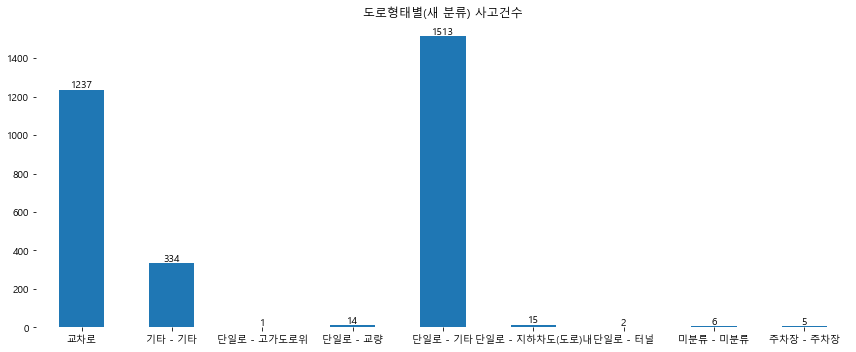

In [36]:
ax = accidList_new_road.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별(새 분류) 사고건수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+10), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()